# Шестопалова Любовь

## ЧИСЛЕННОЕ ИНТЕГРИРОВАНИЕ И  ДИФФЕРЕНЦИРОВАНИЕ

**Подключение библиотек**

In [172]:
import numpy as np
import matplotlib.pyplot as plt

## Задача 6.1. ***Вычислить  интеграл ${I=\int_{a}^{b}f(x)dx}$ с точностью ${\epsilon=10^{-6}}$ по формуле левых прямоугольников  и по формуле индивидуального варианта.***

In [175]:
epsilon=10**(-6)

${I=\int_{0}^{4}x \cdot sinxdx}$

***1. Вычислить интеграл ${I}$ аналитически.***

${I=\int_{0}^{4}xsinxdx=-\int_{0}^{4}xdcosx=-xcosx|_{0}^{4}+\int_{0}^{4}cosxdx}=-4cos(4)+sinx|_{0}^{4}=-4cos(4)+sin(4) \approx 1.857772$

In [180]:
accurate=-4*np.cos(4)+np.sin(4)
print(accurate)

1.8577719881465193


***2. Составить программу, содержащую следующие разделы:***

***a)процедуру-функцию, вычисляющую интеграл по составной квадратурной формуле левых прямоугольников ${I^h}$ с заданным шагом ${h}$.***

***Формула левых прямоугольников: ${S=h \sum_{i=0}^{n-1}f(x_i)}, R=\frac {M_1(b-a)}{2}h$***

***${M_k=max_{i \in [a, b]}}|f^{(k)}(x)|$***

${f(x)=xsinx}$

${f^{'}(x)=sinx+xcosx}$

${M_1 \approx 3.0271}$

In [189]:
def f(x):
    return x*np.sin(x)

In [191]:
a, b=0, 4

In [193]:
maxder=3.0271
n=1
h=(b-a)/n
R=maxder*(b-a)*h/2
while R>=epsilon:
    n+=1
    h=(b-a)/n
    R=maxder*(b-a)*h/2
print(n)

24216801


In [194]:
def lp(a, b, h, f):
    xses=np.arange(a, b, h)
    return h*sum(f(xses))

In [197]:
print(lp(a, b, h, f))

1.8577722381552784


***б) процедуру-функцию, вычисляющую  интеграл по составной квадратурной формуле  из  индивидуального варианта ${I^h}$ с заданным шагом ${h}$.***

***Формула Милна***

${f^{''}(x)=2cosx-xsinx}$

${f^{'''}(x)=-3sinx-xcosx}$

${f^{(4)}(x)=xsinx-4cosx}$

${f^{(5)}(x)=5sinx+xcosx}$

${f^{(6)}(x)=6cosx-xsinx}$

${M_6=6.59638}$

In [207]:
epsilon=10**(-12)

In [209]:
maxder=6.59638
n=1
h=(b-a)/n
R=maxder*(b-a)*(h**6)/1935360
while R>=epsilon:
    n+=1
    h=(b-a)/n
    R=maxder*(b-a)*(h**6)/1935360

In [211]:
def miln(a, b, h, f):
    s=0
    xses=np.arange(a, b+h, h)
    for i in range(1,len(xses)):
        s+=7*f(xses[i-1])+32*f(xses[i-1]+h/4)+12*f((xses[i-1]+xses[i])/2)+32*f(xses[i]-h/4)+7*f(xses[i])
    return h*s/90

In [213]:
print(miln(a, b, h, f))

1.8577719881462824


***в) подпрограмму, вычисляющую значение интеграла с заданной точностью ${\epsilon}$;  оценку погрешности производить на основе правила Рунге.***

***Правило Рунге: ${R^{\frac h 2}=\frac {I^{\frac h 2}-I^h}{2^p-1}}$***

***Уточнение по Рунге: ${I^h=I^{\frac h 2}+\frac {I^{\frac h 2}-I^h}{2^p-1}}$***

In [218]:
epsilon=10**(-6)
n=2
h=(b-a)/n
h1=lp(a, b, h, f)
h2=lp(a, b, h/2, f)
R=(h2-h1)/(2-1)

while abs(R)>=epsilon:
    n*=2
    h=(b-a)/n
    h1=h2
    h2=lp(a, b, h/2, f)
    R=(h2-h1)/(2-1)
print(n)

4194304


In [219]:
print(f'Значение интеграла равно {lp(a, b, h, f)}')
print(f'Погрешность равна {abs(accurate-lp(a, b, h, f))}')

Значение интеграла равно 1.85777343163251
Погрешность равна 1.4434859907375142e-06


In [221]:
epsilon=10**(-13)
n=2
h=(b-a)/n
h1=miln(a, b, h, f)
h2=miln(a, b, h/2, f)
R=(h2-h1)/(2**6-1)
while abs(R)>=epsilon:
    n*=2
    h=(b-a)/n
    h1=h2
    h2=miln(a, b, h/2, f)
    R=(h2-h1)/(2**6-1)
print(n)

64


In [224]:
print(f'Значение интеграла равно {miln(a, b, h, f)}')
print(f'Погрешность равна {abs(accurate-miln(a, b, h, f))}')

Значение интеграла равно 1.8577719881463217
Погрешность равна 1.9761969838327786e-13


***г) вычисление уточненного значение интеграла ${I^{уточн}}$.***

***Левые прямоугольники***

In [228]:
n=8388608
h=(b-a)/n
Ih=lp(a, b, h, f)
Ih2=lp(a, b, h/2, f)
p=1
print(Ih, Ih2)

1.8577727098900954 1.8577723490174236


In [229]:
Rh=abs(Ih-accurate)
Rh2=abs(Ih2-accurate)
print(Rh, Rh2)

7.21743576015399e-07 3.608709042701719e-07


In [230]:
Iut=Ih2+(Ih2-Ih)/(2**p-1)
print(Iut)

1.8577719881447519


In [234]:
Rut=abs(accurate-Iut)
print(Rut)

1.7674750552032492e-12


In [236]:
n=72
h=(b-a)/n
Ih=miln(a, b, h, f)
Ih2=miln(a, b, h/2, f)
p=6
print(Ih, Ih2)

1.8577719881464239 1.857771988146519


In [238]:
Rh=abs(Ih-accurate)
Rh2=abs(Ih2-accurate)

In [240]:
print(Rh, Rh2)

9.547918011776346e-14 4.440892098500626e-16


In [242]:
Iut=Ih2+(Ih2-Ih)/(2**p-1)
print(Iut)

1.8577719881465204


In [244]:
Rut=abs(accurate-Iut)
print(Rut)

1.1102230246251565e-15


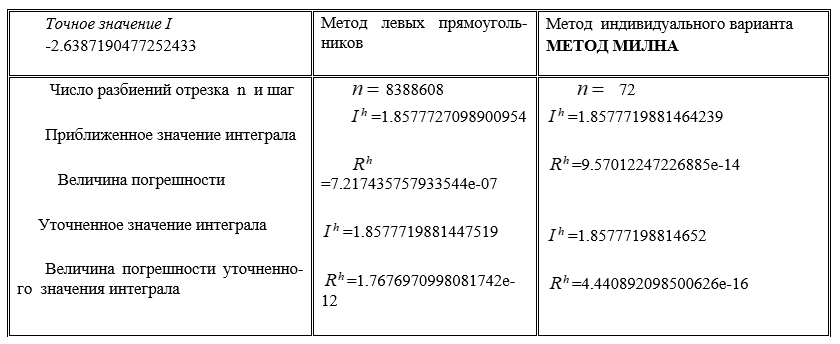

## Задача 6.2. ***Вычислить интеграл от многочлена  ${I=∫_a^b P(x)dx}$ по формуле Гаусса при числе узлов  ${N=2, 3, 4,5}$.  Вычислить аналитически тот же интеграл. Найти абсолютные  погрешности  каждого результата. Объяснить полученные результаты. Отрезок интегрирования взять из задачи 6.1.***

In [248]:
a, b=0, 4
c=np.array([0.4, 0.3, 0.2, 0.1, 2, 0.8, 6.5, -4.4, 6.1, 0, 0])
def P(x):
    global c
    s=0
    for i in range(len(c)):
        s+=c[i]*x**i
    return s

In [250]:
# Узлы и веса для N = 2
t2 = np.array([-1/np.sqrt(3), 1/np.sqrt(3)])
a2 = np.array([1, 1])

# Узлы и веса для N = 3
t3 = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
a3 = np.array([5/9, 8/9, 5/9])

# Узлы и веса для N = 4
t4 = np.array([-np.sqrt((3/7) + (2/7)*np.sqrt(6/5)), -np.sqrt((3/7) - (2/7)*np.sqrt(6/5)),
np.sqrt((3/7) - (2/7)*np.sqrt(6/5)), np.sqrt((3/7) + (2/7)*np.sqrt(6/5))])
a4 = np.array([(18 - np.sqrt(30))/36, (18 + np.sqrt(30))/36,
(18 + np.sqrt(30))/36, (18 - np.sqrt(30))/36])

# Узлы и веса для N = 5
t5 = np.array([-1/3 * np.sqrt(5 + 2*np.sqrt(10/7)), -1/3 * np.sqrt(5 - 2*np.sqrt(10/7)),
0, 1/3 * np.sqrt(5 - 2*np.sqrt(10/7)), 1/3 * np.sqrt(5 + 2*np.sqrt(10/7))])
a5 = np.array([(322 - 13*np.sqrt(70))/900, (322 + 13*np.sqrt(70))/900,
128/225, (322 + 13*np.sqrt(70))/900, (322 - 13*np.sqrt(70))/900])

In [252]:
def gauss(a, b, uzel, ves, f):
    s=0
    for i in range(len(uzel)):
        s+=ves[i]*f((a+b)/2+(b-a)/2*uzel[i])
    return (b-a)*s/2

In [254]:
I2=gauss(a, b, t2, a2, P)
I3=gauss(a, b, t3, a3, P)
I4=gauss(a, b, t4, a4, P)
I5=gauss(a, b, t5, a5, P)
acc=157814.69
print('Точное значение интегралла равно:', acc)
print('Значение по формуле Гаусса при N=2:', I2, 'Погрешность:', abs(157814.69 - I2)/acc*100, '%')
print('Значение по формуле Гаусса при N=3:', I3, 'Погрешность:', abs(157814.69 - I3)/acc*100, '%')
print('Значение по формуле Гаусса при N=4:', I4, 'Погрешность:', abs(157814.69 - I4)/acc*100, '%')
print('Значение по формуле Гаусса при N=5:', I5, 'Погрешность:', abs(157814.69 - I5)/acc*100, '%')

Точное значение интегралла равно: 157814.69
Значение по формуле Гаусса при N=2: 106049.2345679012 Погрешность: 32.80141755631164 %
Значение по формуле Гаусса при N=3: 153895.10613333332 Погрешность: 2.483662241244261 %
Значение по формуле Гаусса при N=4: 157778.43178231284 Погрешность: 0.022975185445135427 %
Значение по формуле Гаусса при N=5: 157814.69206349197 Погрешность: 1.3075411191324562e-06 %
